# Import Dependencies

In [22]:
import atd2022
import torch
import pandas as pd
import numpy as np
from atd_informer import atd_informer
from utils.tools import dotdict
from atd_wrapper import InformerForcaster
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)

In [23]:
import importlib
importlib.reload(atd_informer)

<module 'atd_informer.atd_informer' from '/scratch/wzong/LISP-ATD-2022/Informer/atd_informer/atd_informer.py'>

# Small Scale Testing (pls ignore)

In [3]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=0

args.cols=1
args.checkpoints = "/Users/will/Desktop/tmp"



args.seq_len=5
args.label_len=3
args.pred_len=1


args.batch_size = 1
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False

args.itr=1
args.train_epochs=1
args.patience=3

In [4]:
informer = atd_informer.ATD_Informer

#### Model Training (ignore pls)

In [5]:
for ii in range(args.itr):
        # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = informer(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)
    

TypeError: __init__() missing 1 required positional argument: 'df'

### Generate Prediction (Ignore Pls)

#setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                                                                                                     args.seq_len, args.label_len, args.pred_len,
                                                                                                     args.d_model, args.n_heads, args.e_layers, args.d_layers,
                                                                                                     args.d_ff, args.attn, args.factor, args.embed, args.distil, 
                                                                                                     args.mix, args.des)

In [6]:
setting= "string"

In [7]:
exp.predict(setting)


check data_x shape (8, 20)
check data_y shape (8, 20)
data_x [[ 3  3  4 21  3  4  0  5  0  0  0  0  0  0  0  0 14  0  1  0]
 [ 0  0  0  3  0  0  2  1  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 7  5 26 22  5  0  0  1  1  0  3  1  0  0  0  0  1  0  0  0]
 [13  9 20 85  4  2  0  2  8  0  0  0  0  0  0  1  8  0  0  0]
 [14  5  8 10  1  0  0  1  0  1  0  1  0  0  0  0  3  0  2  0]
 [ 5  2  0 23  3  2  5  1  0  0  2  0  0  0  0  3  4  0  4  0]
 [ 3  2  7 37  6 10  4  7  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 7  6  7 49  6  0  1  2  2  2  6  0  1  0  0  0  2  0  4  0]]
data_y [[ 3  3  4 21  3  4  0  5  0  0  0  0  0  0  0  0 14  0  1  0]
 [ 0  0  0  3  0  0  2  1  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 7  5 26 22  5  0  0  1  1  0  3  1  0  0  0  0  1  0  0  0]
 [13  9 20 85  4  2  0  2  8  0  0  0  0  0  0  1  8  0  0  0]
 [14  5  8 10  1  0  0  1  0  1  0  1  0  0  0  0  3  0  2  0]
 [ 5  2  0 23  3  2  5  1  0  0  2  0  0  0  0  3  4  0  4  0]
 [ 3  2  7 37  6 10  4  7  0  1  1  1  0  0  0  

In [8]:
prediction = np.load('./results/'+setting+'/real_prediction.npy')

prediction.shape

(4, 1, 20)

In [9]:
prediction

array([[[ 6.8321867e+00,  4.1660962e+00,  5.5001898e+00,  1.3873180e+01,
          4.5615072e+00,  1.6799215e+00,  1.7307360e+00,  1.9218162e+00,
          1.6953726e+00,  1.4328616e+00,  1.7674569e+00,  1.1856138e+00,
          7.7103615e-01,  3.1425217e-01,  2.0257424e-01,  6.5961373e-01,
          1.4129713e+00,  3.5161200e-01,  1.3668158e+00, -7.2176936e-03]],

       [[ 6.8742909e+00,  3.9449117e+00,  5.3744726e+00,  1.3874529e+01,
          4.5440998e+00,  1.5384877e+00,  1.7218031e+00,  1.8847367e+00,
          1.8090762e+00,  1.4132628e+00,  1.6957563e+00,  1.2538692e+00,
          8.0295253e-01,  3.5027868e-01,  2.6355246e-01,  6.1726761e-01,
          1.4184737e+00,  3.3506823e-01,  1.2761524e+00, -3.8309142e-02]],

       [[ 6.8484159e+00,  4.1268854e+00,  5.3488512e+00,  1.3879792e+01,
          4.6213698e+00,  1.5509696e+00,  1.6716541e+00,  2.0483508e+00,
          1.7572607e+00,  1.5358107e+00,  1.7793263e+00,  1.2569684e+00,
          8.8902807e-01,  4.5104560e-01,  1.3

# Testing ATD Protocal (Passed)

In [4]:
truth = atd2022.io.read_csv()

In [10]:
test = truth[["AA", "AC"]]

In [11]:
test.head()

Region                AA                                                      \
Event                 01 02  03  04 05   06 07 08 09 10 11 12 13 14 15 16 17   
2013-12-30/2014-01-05  0  0   0   6  0    0  0  0  0  0  0  0  0  0  0  0  0   
2014-01-06/2014-01-12  2  0   0  11  0    1  0  0  0  0  0  0  0  0  0  0  0   
2014-01-13/2014-01-19  0  1   3   7  1    0  0  0  0  0  1  0  0  0  0  0  0   
2014-01-20/2014-01-26  0  1   0   4  0    0  0  2  0  0  0  0  0  0  0  1  0   
2014-01-27/2014-02-02  6  1  59   3  0  103  0  4  0  0  0  0  0  0  0  0  0   

Region                         AC                                             \
Event                 18 19 20 01 02 03  04 05 06 07 08 09 10 11 12 13 14 15   
2013-12-30/2014-01-05  0  0  0  4  4  6   9  0  0  1  1  1  0  1  0  0  0  0   
2014-01-06/2014-01-12  0  0  0  5  0  8  34  2  1  1  0  0  0  0  2  0  0  0   
2014-01-13/2014-01-19  0  1  0  1  0  4   3  0  2  0  0  0  0  0  0  0  0  0   
2014-01-20/2014-01-26  0  0  0  3  0  6   1  1  0  0  0  0  0  2  0  0  0  0   
2014-01-27/2014-02-02  0  0  0  8  2  2  47  6  4  3  0  0  0  0  2  1  0  0   

Region                                 
Event                 16  17 18 19 20  
2013-12-30/2014-01-05  0  11  0  0  0  
2014-01-06/2014-01-12  0   4  0  3  0  
2014-01-13/2014-01-19  0   1  1  1  0  
2014-01-20/2014-01-26  0   0  0  3  0  
2014-01-27/2014-02-02  0   3  0  0  0

In [28]:
truth.index

PeriodIndex(['2013-12-30/2014-01-05', '2014-01-06/2014-01-12',
             '2014-01-13/2014-01-19', '2014-01-20/2014-01-26',
             '2014-01-27/2014-02-02', '2014-02-03/2014-02-09',
             '2014-02-10/2014-02-16', '2014-02-17/2014-02-23',
             '2014-02-24/2014-03-02', '2014-03-03/2014-03-09',
             ...
             '2015-11-16/2015-11-22', '2015-11-23/2015-11-29',
             '2015-11-30/2015-12-06', '2015-12-07/2015-12-13',
             '2015-12-14/2015-12-20', '2015-12-21/2015-12-27',
             '2015-12-28/2016-01-03', '2016-01-04/2016-01-10',
             '2016-01-11/2016-01-17', '2016-01-18/2016-01-24'],
            dtype='period[W-SUN]', length=108)

In [10]:
cols = truth.columns

In [15]:
type(cols)

pandas.core.indexes.multi.MultiIndex

In [25]:
tmp = truth.to_numpy()

In [30]:
test_df = pd.DataFrame(data=tmp, index = truth.index, columns = truth.columns)

In [9]:
exp = InformerForcaster(args)

In [10]:
exp.fit(test)

got here
Use GPU: cuda:None
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl96_ll48_pl1_dm512_nh8_el4_dl3_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 2.211230516433716
Epoch: 1, Steps: 1 | Train Loss: 118.4866562 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 2 cost time: 0.1260998249053955
Epoch: 2, Steps: 1 | Train Loss: 117.1688843 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
0
got here
Use GPU: cuda:None
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl96_ll48_pl1_dm512_nh8_el4_dl3_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.29504871368408203
Epoch: 1, Steps: 1 | Train Loss: 808.9169312 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Updating learning rate to 1e-

In [11]:
exp.predict()

Event                  01  02  03  04  05  06  07  08  09  10  11  12  13  14  \
2018-01-08/2018-01-14  13   9  20  85   4   2   0   2   8   0   0   0   0   0   
2018-01-15/2018-01-21  14   5   8  10   1   0   0   1   0   1   0   1   0   0   
2018-01-22/2018-01-28   5   2   0  23   3   2   5   1   0   0   2   0   0   0   
2018-01-29/2018-02-04   3   2   7  37   6  10   4   7   0   1   1   1   0   0   
2018-02-05/2018-02-11   7   6   7  49   6   0   1   2   2   2   6   0   1   0   

Event                  15  16  17  18  19  20  
2018-01-08/2018-01-14   0   1   8   0   0   0  
2018-01-15/2018-01-21   0   0   3   0   2   0  
2018-01-22/2018-01-28   0   3   4   0   4   0  
2018-01-29/2018-02-04   0   0   0   0   0   0  
2018-02-05/2018-02-11   0   0   2   0   4   0  
[-1. -1. -1.  1. -0.  0. -1.  1. -0. -0. -0.  1. -0. -0. -0. -0. -0. -0.
 -1. -0.]
Event                    01   02   03    04   05    06   07   08   09   10  \
2018-01-15/2018-01-21  14.0  5.0  8.0  10.0  1.0   0.0  0.0  1.0

Event                   01   02   03   04   05   06   07   08   09   10   11  \
2018-02-12/2018-02-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2018-02-19/2018-02-25  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2018-02-26/2018-03-04  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2018-03-05/2018-03-11  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

Event                   12   13   14   15   16   17   18   19   20  
2018-02-12/2018-02-18  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2018-02-19/2018-02-25  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2018-02-26/2018-03-04  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2018-03-05/2018-03-11  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0

In [23]:
exp.predict()

Region                  AA                                                     \
Event                   01   02   03    04   05   06   07   08   09   10   11   
2018-02-12/2018-02-18  9.0  5.0  7.0  18.0  5.0  2.0  1.0  2.0  2.0  1.0  3.0   
2018-02-19/2018-02-25  9.0  5.0  7.0  18.0  6.0  2.0  1.0  2.0  2.0  1.0  3.0   
2018-02-26/2018-03-04  9.0  5.0  7.0  18.0  5.0  2.0  1.0  2.0  2.0  1.0  3.0   
2018-03-05/2018-03-11  9.0  5.0  7.0  18.0  6.0  2.0  2.0  2.0  2.0  1.0  3.0   

Region                                                                AC  \
Event                   12   13   14   15   16   17   18   19   20    01   
2018-02-12/2018-02-18  2.0  1.0  0.0  0.0  0.0  3.0  1.0  2.0  0.0  14.0   
2018-02-19/2018-02-25  1.0  1.0  0.0  0.0  0.0  3.0  1.0  2.0  0.0  14.0   
2018-02-26/2018-03-04  2.0  1.0  0.0  0.0  0.0  3.0  1.0  2.0  0.0  14.0   
2018-03-05/2018-03-11  1.0  1.0  0.0  0.0  0.0  3.0  1.0  2.0  0.0  14.0   

Region                                                                      \
Event                    02   03    04    05   06   07   08   09   10   11   
2018-02-12/2018-02-18  10.0  9.0  21.0  11.0  4.0  5.0  5.0  3.0  3.0  8.0   
2018-02-19/2018-02-25  10.0  9.0  21.0  11.0  4.0  5.0  5.0  3.0  3.0  8.0   
2018-02-26/2018-03-04  10.0  9.0  21.0  11.0  4.0  5.0  5.0  3.0  3.0  8.0   
2018-03-05/2018-03-11  10.0  9.0  21.0  11.0  4.0  5.0  5.0  3.0  3.0  8.0   

Region                                                              
Event                   12   13   14   15   16   17   18   19   20  
2018-02-12/2018-02-18  4.0  3.0  1.0  0.0  1.0  7.0  1.0  5.0  0.0  
2018-02-19/2018-02-25  4.0  3.0  1.0  0.0  1.0  7.0  1.0  5.0  0.0  
2018-02-26/2018-03-04  4.0  3.0  1.0  0.0  1.0  7.0  1.0  5.0  0.0  
2018-03-05/2018-03-11  4.0  3.0  1.0  0.0  1.0  7.0  1.0  5.0  0.0

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

8

In [24]:
for i in range(8):
    print(torch.cuda.get_device_name(i))

Quadro RTX 8000
Quadro RTX 8000
Quadro RTX 5000
Quadro RTX 5000
Quadro RTX 5000
Quadro RTX 5000
Quadro RTX 5000
Quadro RTX 5000


In [9]:
lst = exp.model_list

In [10]:
len(lst)

1

In [11]:
test_mod = exp.model_list[0]

In [12]:
setting="str"

In [13]:
pred =test_mod.predict()

x,y [[13  9 20 85  4  2  0  2  8  0  0  0  0  0  0  1  8  0  0  0]
 [14  5  8 10  1  0  0  1  0  1  0  1  0  0  0  0  3  0  2  0]
 [ 5  2  0 23  3  2  5  1  0  0  2  0  0  0  0  3  4  0  4  0]
 [ 3  2  7 37  6 10  4  7  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 7  6  7 49  6  0  1  2  2  2  6  0  1  0  0  0  2  0  4  0]] [[ 5  2  0 23  3  2  5  1  0  0  2  0  0  0  0  3  4  0  4  0]
 [ 3  2  7 37  6 10  4  7  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 7  6  7 49  6  0  1  2  2  2  6  0  1  0  0  0  2  0  4  0]]


In [14]:
pred

array([ 6.490034  ,  4.462694  ,  5.8469057 , 13.973756  ,  4.458868  ,
        1.6943204 ,  1.80356   ,  1.9661559 ,  1.8184396 ,  1.4654043 ,
        2.014461  ,  1.276834  ,  1.0240163 ,  0.4990942 ,  0.05070882,
        0.6254189 ,  1.1649    ,  0.27910122,  0.85286796, -0.02110814],
      dtype=float32)

In [10]:
a1=np.array([1,2,3])

In [11]:
a2=np.array([2,3,4])

In [13]:
np.concatenate([a1,a2])

array([1, 2, 3, 2, 3, 4])

In [16]:
truth = atd2022.io.read_csv()

In [11]:
truth.tail()

Region                 AA                                                     \
Event                  01 02  03  04 05  06 07 08 09 10 11 12 13 14 15 16 17   
2018-01-08/2018-01-14  13  9  20  85  4   2  0  2  8  0  0  0  0  0  0  1  8   
2018-01-15/2018-01-21  14  5   8  10  1   0  0  1  0  1  0  1  0  0  0  0  3   
2018-01-22/2018-01-28   5  2   0  23  3   2  5  1  0  0  2  0  0  0  0  3  4   
2018-01-29/2018-02-04   3  2   7  37  6  10  4  7  0  1  1  1  0  0  0  0  0   
2018-02-05/2018-02-11   7  6   7  49  6   0  1  2  2  2  6  0  1  0  0  0  2   

Region                          AC                                           \
Event                 18 19 20  01  02  03   04  05 06  07  08 09 10  11 12   
2018-01-08/2018-01-14  0  0  0  34   9  14  107   3  2   6   3  0  1   8  7   
2018-01-15/2018-01-21  0  2  0  36  11  13   67  18  6   7  12  7  5  20  2   
2018-01-22/2018-01-28  0  4  0  24  13   9   40  12  9   4   5  1  3  21  5   
2018-01-29/2018-02-04  0  0  0  21  13  12   46  17  6  10   6  1  4  17  1   
2018-02-05/2018-02-11  0  4  0  32  12  23   64  13  8   7  28  4  4  12  3   

Region                                             AE                       \
Event                  13 14 15 16  17 18  19 20   01   02   03    04   05   
2018-01-08/2018-01-14  16  1  0  2   3  0  18  0  421  204  340   975  494   
2018-01-15/2018-01-21   3  0  0  0   1  0   6  0  474  182  596  1277  390   
2018-01-22/2018-01-28   1  1  0  1   2  0   6  0  516  201  710  1301  444   
2018-01-29/2018-02-04   2  1  0  0   9  0   4  0  419  190  411  1011  441   
2018-02-05/2018-02-11   4  0  0  0  15  0   1  0  639  250  946  2613  603   

Region                                                                      \
Event                   06   07   08  09  10   11  12  13  14  15  16   17   
2018-01-08/2018-01-14   87  111   82  58  31  158  67  33  25  13  23  169   
2018-01-15/2018-01-21  106  169   85  50  35  160  65  21  14   6  55  139   
2018-01-22/2018-01-28  135  156   98  93  59  270  62  33  29   6  33  153   
2018-01-29/2018-02-04  101  164  172  61  40  214  70  18  12   4  37  183   
2018-02-05/2018-02-11  125  161  126  57  58  190  76  35  25  13  33  217   

Region                               AF                                      \
Event                  18   19 20    01   02   03    04   05   06   07   08   
2018-01-08/2018-01-14  20   96  0   964  357  419  1612  480  221  267  304   
2018-01-15/2018-01-21  17   79  0  1608  441  522  2752  617  271  304  384   
2018-01-22/2018-01-28  32  131  0  1801  532  377  1778  586  272  374  450   
2018-01-29/2018-02-04  32  139  0  1629  587  491  2672  627  281  342  492   
2018-02-05/2018-02-11  26  115  0  1175  368  453  1805  703  178  310  344   

Region                                                                        \
Event                   09   10    11   12   13  14  15   16   17   18    19   
2018-01-08/2018-01-14   72  110   496  189  162  17  42  135  250  159  1245   
2018-01-15/2018-01-21   95  126   622  214  181  36  82  106  313  302  1790   
2018-01-22/2018-01-28  154  128  1141  198  256  62  98  166  306  556  2571   
2018-01-29/2018-02-04  142  106  1052  266  212  52  91   94  294  411  1820   
2018-02-05/2018-02-11  100  124   614  173  117  42  94   76  322  232  1445   

Region                    AG                                                  \
Event                 20  01  02  03   04  05  06  07  08  09  10  11  12 13   
2018-01-08/2018-01-14  0  94  73  17  195  56  26  23  12   8  19  36  17  1   
2018-01-15/2018-01-21  3  69  42  51  182  66  45  29  24   9   9  31  27  7   
2018-01-22/2018-01-28  1  68  31  52  239  78  23  24  33   5   8  34  12  6   
2018-01-29/2018-02-04  6  76  42  43  187  56  36  18  13  25  14  23  27  6   
2018-02-05/2018-02-11  4  83  38  29  241  88  22  17  21  20  16  69  32  7   

Region                                            AJ                          \
Event                 14  15  16  1

In [12]:
dt=truth.index[-1]

In [13]:
dt

Period('2018-02-05/2018-02-11', 'W-SUN')

In [14]:
dt+1

Period('2018-02-12/2018-02-18', 'W-SUN')

In [15]:
dt+2

Period('2018-02-19/2018-02-25', 'W-SUN')

In [16]:
dt+3

Period('2018-02-26/2018-03-04', 'W-SUN')

In [17]:
dt+4

Period('2018-03-05/2018-03-11', 'W-SUN')

# VRAM Optimized Small Scale Testing

In [4]:
truth = atd2022.io.read_csv()

In [5]:
test1=truth["AA"]

In [5]:
test = truth[["AA", "AC"]]

In [6]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 1024 # dimension of model
args.n_heads = 12 # num of heads
args.e_layers = 4 # num of encoder layers
args.d_layers = 3 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=0


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"


"""
args.seq_len=96
args.label_len=48
args.pred_len=1


args.batch_size = 24
args.learning_rate = 0.00001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=2
args.train_epochs=250
args.patience=25
"""

args.seq_len=12
args.label_len=6
args.pred_len=1


args.batch_size = 1
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False

args.itr=1
args.train_epochs=1
args.patience=3

In [7]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 1024 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=48
args.label_len=24
args.pred_len=1


args.batch_size = 50
args.learning_rate = 0.00001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=1
args.patience=5

In [8]:
exp = InformerForcaster(args)

In [9]:
exp.fit(test)

Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 1.7275519371032715
Epoch: 1, Steps: 2 | Train Loss: 74.3725548 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
0
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.10946297645568848
Epoch: 1, Steps: 2 | Train Loss: 498.2518921 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
1


In [10]:
lst=exp.predict([1,2,3,4])

In [11]:
lst

Region                  AA                                                    \
Event                   01   02   03   04   05   06   07   08   09   10   11   
2018-02-12/2018-02-18  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2018-02-19/2018-02-25  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
2018-02-26/2018-03-04  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
2018-03-05/2018-03-11  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   

Region                                                               AC       \
Event                   12   13   14   15   16   17   18   19   20   01   02   
2018-02-12/2018-02-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2018-02-19/2018-02-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2018-02-26/2018-03-04  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2018-03-05/2018-03-11  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

Region                                                                        \
Event                   03   04   05   06   07   08   09   10   11   12   13   
2018-02-12/2018-02-18  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
2018-02-19/2018-02-25  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2018-02-26/2018-03-04  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2018-03-05/2018-03-11  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

Region                                                    
Event                   14   15   16   17   18   19   20  
2018-02-12/2018-02-18  0.0  0.0  1.0  0.0  1.0  0.0  0.0  
2018-02-19/2018-02-25  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2018-02-26/2018-03-04  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
2018-03-05/2018-03-11  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [14]:
type(lst.columns)

pandas.core.indexes.base.Index

# Full Scale Testing on ATD Protocol (Still having issues)

In [17]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 1024 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=48
args.label_len=24
args.pred_len=1


args.batch_size = 50
args.learning_rate = 0.00001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=13
args.patience=5

In [18]:
lispDL = InformerForcaster(args)

In [19]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [20]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<atd_wrapper.InformerForcaster object at 0x7f08428bdeb0>:   0%|          | 0/5 [00:00<?, ?it/s]

Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015544891357421875
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001621246337890625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004963874816894531
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.000164031982421875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00051856

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005199909210205078
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001614093780517578
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005185604095458984
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001842975616455078
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005002021789550781
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001621246337890625
Epoch: 8, Steps: 0 | T

Epoch: 6 cost time: 0.00015783309936523438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005042552947998047
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00015664100646972656
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005095005035400391
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001666545867919922
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005006790161132812
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005576610565185547
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017023086547851562
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.000499725341796875
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00016164779663085938
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00016641616821289062
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
9
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.00016164779663085938
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001652240753173828
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
12
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014781951904296875
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00016355514526367188
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005099773406982422
Epoch: 3, 

Epoch: 2 cost time: 0.00019121170043945312
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005848407745361328
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00021219253540039062
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005335807800292969
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017642974853515625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005967617034912109
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005202293395996094
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018072128295898438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005414485931396484
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001761913299560547
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005097389221191406
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001773834228515625
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.00017333030700683594
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0001804828643798828
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017762184143066406
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005521774291992188
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017523765563964844
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001785755157470703
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005540847778320312
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001862049102783203
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001766681671142578
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
25
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015473365783691406
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001888275146484375
Epoch: 2, 

28
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001456737518310547
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005083084106445312
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001914501190185547
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00033211708068847656
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017786026000976562
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00034618377685546875
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001761913299560547
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00034427642822265625
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018024444580078125
Epoch: 8, Steps: 

Epoch: 6 cost time: 0.00018405914306640625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005435943603515625
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.000179290771484375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005142688751220703
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018286705017089844
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005435943603515625
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005102157592773438
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001819133758544922
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005087852478027344
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001800060272216797
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018525123596191406
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
38
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.0001800060272216797
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018167495727539062
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
41
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001456737518310547
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001780986785888672
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005483627319335938
Epoch: 3, St

Epoch: 2 cost time: 0.00018095970153808594
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00054168701171875
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00019478797912597656
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005917549133300781
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018262863159179688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005929470062255859
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005178451538085938
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018262863159179688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005521774291992188
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00016045570373535156
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005841255187988281
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001766681671142578
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.0002033710479736328
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005097389221191406
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017499923706054688
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005555152893066406
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018858909606933594
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001735687255859375
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005109310150146484
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019884109497070312
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017309188842773438
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
54
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014352798461914062
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018072128295898438
Epoch: 

57
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001456737518310547
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017714500427246094
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005233287811279297
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001723766326904297
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005114078521728516
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017523765563964844
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005009174346923828
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018072128295898438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005125999450683594
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001773834228515625
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00017499923706054688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005052089691162109
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018143653869628906
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005266666412353516
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00020122528076171875
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005307197570800781
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005128383636474609
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017642974853515625
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005564689636230469
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001785755157470703
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017976760864257812
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
67
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00017571449279785156
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001723766326904297
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
70
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014448165893554688
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017952919006347656
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005164146423339844
Epoch: 3, 

Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005588531494140625
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017070770263671875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000514984130859375
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017213821411132812
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005533695220947266
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000537872314453125
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017547607421875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005221366882324219
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001761913299560547
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005183219909667969
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017833709716796875
Epoch: 10, Steps: 0 | T

Epoch: 8 cost time: 0.00017452239990234375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005152225494384766
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017452239990234375
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005185604095458984
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017499923706054688
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017333030700683594
Epoch: 13, Steps: 0 | Train Loss: nan Vali 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005085468292236328
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.000179290771484375
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017261505126953125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
83
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014901161193847656
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2,

86
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001430511474609375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001804828643798828
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005130767822265625
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001723766326904297
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00050

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005307197570800781
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017547607421875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005428791046142578
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017547607421875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005338191986083984
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017571449279785156
Epoch: 8, Steps: 0 | Trai

Epoch: 6 cost time: 0.00017905235290527344
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005247592926025391
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001800060272216797
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000545501708984375
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017547607421875
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005249977111816406
Epoch: 11, Steps: 0 |

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005006790161132812
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017213821411132812
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005657672882080078
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001761913299560547
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017833709716796875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
96
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00017595291137695312
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001742839813232422
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
99
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001442432403564453
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017833709716796875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.000518798828125
Epoch: 3, Steps

Epoch: 2 cost time: 0.0001819133758544922
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005280971527099609
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001773834228515625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005657672882080078
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017309188842773438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005383491516113281
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005867481231689453
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001766681671142578
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005478858947753906
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001800060272216797
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005877017974853516
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001747608184814453
Epoch: 10, Steps: 0 |

Epoch: 8 cost time: 0.00018072128295898438
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005407333374023438
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001780986785888672
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004944801330566406
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017952919006347656
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020647048950195312
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005774497985839844
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001773834228515625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001773834228515625
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
112
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014638900756835938
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017714500427246094
Epoch: 2

115
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001518726348876953
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001785755157470703
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005016326904296875
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001773834228515625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0006327629089355469
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017690658569335938
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005459785461425781
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00020503997802734375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005223751068115234
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001735687255859375
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00017833709716796875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005381107330322266
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00019288063049316406
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004992485046386719
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001914501190185547
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005238056182861328
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005462169647216797
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017595291137695312
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005328655242919922
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001747608184814453
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001804828643798828
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
125
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00019979476928710938
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017571449279785156
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
128
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014734268188476562
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017547607421875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004642009735107422
Epoch: 3, S

Epoch: 2 cost time: 0.00017833709716796875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004391670227050781
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017523765563964844
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005199909210205078
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018453598022460938
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005359649658203125
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004930496215820312
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001747608184814453
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005691051483154297
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017261505126953125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005040168762207031
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001773834228515625
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.00017642974853515625
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005168914794921875
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018930435180664062
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005195140838623047
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017380714416503906
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017762184143066406
Epoch: 13, Steps: 0 | Train Loss: nan Vali 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004916191101074219
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001800060272216797
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017905235290527344
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
141
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015544891357421875
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00019979476928710938
Epoch: 

144
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001442432403564453
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001742839813232422
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005218982696533203
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017333030700683594
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Epoch: 2 cost time: 0.0001773834228515625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005209445953369141
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017333030700683594
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005223751068115234
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017404556274414062
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005211830139160156
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005257129669189453
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001735687255859375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00049591064453125
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017571449279785156
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005030632019042969
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001704692840576172
Epoch: 10, Steps: 0 | 

Epoch: 8 cost time: 0.00017952919006347656
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005090236663818359
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017142295837402344
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005292892456054688
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001761913299560547
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017833709716796875
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004925727844238281
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017642974853515625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001742839813232422
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
157
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001475811004638672
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017714500427246094
Epoch: 2

160
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00021147727966308594
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001819133758544922
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005202293395996094
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001704692840576172
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005116462707519531
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001766681671142578
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005352497100830078
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017499923706054688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005228519439697266
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001728534698486328
Epoch: 8, Steps: 0 | 

Epoch: 6 cost time: 0.00017571449279785156
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005390644073486328
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017786026000976562
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005388259887695312
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001766681671142578
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005447864532470703
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005323886871337891
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.000179290771484375
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005257129669189453
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001766681671142578
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020360946655273438
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
170
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.0001804828643798828
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001766681671142578
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
173
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014281272888183594
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017118453979492188
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005409717559814453
Epoch: 3, 

Epoch: 2 cost time: 0.00017786026000976562
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005309581756591797
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017642974853515625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005466938018798828
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.000171661376953125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005140304565429688
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005116462707519531
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00016736984252929688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004210472106933594
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017404556274414062
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005228519439697266
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001761913299560547
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00017762184143066406
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005009174346923828
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017881393432617188
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005218982696533203
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0002052783966064453
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017881393432617188
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005245208740234375
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017142295837402344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.000171661376953125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
186
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014138221740722656
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018286705017089844
Epoch: 2

189
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001239776611328125
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001728534698486328
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00044918060302734375
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017905235290527344
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005438327789306641
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017571449279785156
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005364418029785156
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017404556274414062
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005366802215576172
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001747608184814453
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00017452239990234375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005252361297607422
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017642974853515625
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005311965942382812
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017499923706054688
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005192756652832031
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000568389892578125
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0002009868621826172
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005598068237304688
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001735687255859375
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017905235290527344
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
199
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.00018835067749023438
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017118453979492188
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
202
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014352798461914062
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017571449279785156
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.000560760498046875
Epoch: 3,

Epoch: 2 cost time: 0.00018858909606933594
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005502700805664062
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00016951560974121094
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005733966827392578
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017571449279785156
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005919933319091797
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005261898040771484
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00016951560974121094
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00017404556274414062
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017786026000976562
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005247592926025391
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017380714416503906
Epoch: 10, Steps:

Epoch: 8 cost time: 0.0001728534698486328
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005128383636474609
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001747608184814453
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005340576171875
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001862049102783203
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001742839813232422
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: n

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005221366882324219
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001728534698486328
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00016832351684570312
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
215
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014495849609375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017523765563964844
Epoch: 2, 

218
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001423358917236328
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00020074844360351562
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005400180816650391
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017333030700683594
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Epoch: 2 cost time: 0.0001823902130126953
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005011558532714844
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00016880035400390625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0003886222839355469
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017881393432617188
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005242824554443359
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004971027374267578
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017452239990234375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004954338073730469
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017189979553222656
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005249977111816406
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001888275146484375
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00017261505126953125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005435943603515625
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001747608184814453
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005517005920410156
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017881393432617188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.000171661376953125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Los

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005524158477783203
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017309188842773438
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017499923706054688
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
231
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014829635620117188
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018167495727539062
Epoch:

234
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014662742614746094
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001780986785888672
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005323886871337891
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017952919006347656
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.000545501708984375
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017309188842773438
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005228519439697266
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017547607421875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.000522613525390625
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001742839813232422
Epoch: 8, Steps: 0 | Trai

Epoch: 6 cost time: 0.00017762184143066406
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005216598510742188
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017452239990234375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005197525024414062
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001990795135498047
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005114078521728516
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005171298980712891
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001742839813232422
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005016326904296875
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017213821411132812
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018358230590820312
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
244
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda

Epoch: 12 cost time: 0.00017189979553222656
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001747608184814453
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
247
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014257431030273438
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001823902130126953
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005116462707519531
Epoch: 3, 

Epoch: 2 cost time: 0.00018024444580078125
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005393028259277344
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017762184143066406
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005035400390625
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001780986785888672
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005176067352294922
Epoch: 7, Steps: 0 | Tr

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004832744598388672
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001766681671142578
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005645751953125
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00019240379333496094
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005092620849609375
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00019598007202148438
Epoch: 10, Steps: 0 | 

Epoch: 8 cost time: 0.00017833709716796875
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005214214324951172
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017690658569335938
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005192756652832031
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017380714416503906
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017786026000976562
Epoch: 13, Steps: 0 | Train Loss: nan Vali 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005950927734375
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00016379356384277344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001544952392578125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
0
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014472007751464844
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001633167266845703
Epoch: 2, Ste

3
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014281272888183594
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00015473365783691406
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005075931549072266
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.000156402587890625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00052

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004956722259521484
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00015401840209960938
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005033016204833984
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00015926361083984375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004973411560058594
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001583099365234375
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00017309188842773438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004849433898925781
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017309188842773438
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000484466552734375
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001804828643798828
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005197525024414062
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004544258117675781
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00015592575073242188
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00047016143798828125
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00015878677368164062
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00015664100646972656
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
13
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cud

Epoch: 12 cost time: 0.00017189979553222656
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001697540283203125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
16
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001456737518310547
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017833709716796875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004978179931640625
Epoch: 3, S

Epoch: 2 cost time: 0.00020766258239746094
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004734992980957031
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017499923706054688
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005295276641845703
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018024444580078125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005280971527099609
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005395412445068359
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001800060272216797
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005402565002441406
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001823902130126953
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005369186401367188
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001728534698486328
Epoch: 10, Steps: 0 |

Epoch: 8 cost time: 0.0001819133758544922
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005643367767333984
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00015497207641601562
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005395412445068359
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001823902130126953
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001823902130126953
Epoch: 13, Steps: 0 | Train Loss: nan Vali Los

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005104541778564453
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001773834228515625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017452239990234375
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
29
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001442432403564453
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00019216537475585938
Epoch: 2,

32
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014209747314453125
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017714500427246094
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00048065185546875
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001804828643798828
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00052

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005507469177246094
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017499923706054688
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005271434783935547
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001747608184814453
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005445480346679688
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017595291137695312
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.0001747608184814453
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005486011505126953
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017333030700683594
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005421638488769531
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017952919006347656
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005486011505126953
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005180835723876953
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018835067749023438
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004937648773193359
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017642974853515625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001704692840576172
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
42
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.0001735687255859375
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017762184143066406
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
45
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014257431030273438
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018095970153808594
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005285739898681641
Epoch: 3, 

Epoch: 2 cost time: 0.00018262863159179688
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005180835723876953
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017523765563964844
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005171298980712891
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017261505126953125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005185604095458984
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005826950073242188
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017690658569335938
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0006048679351806641
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017833709716796875
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005273818969726562
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017380714416503906
Epoch: 10, Steps: 

Epoch: 8 cost time: 0.000179290771484375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005786418914794922
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017571449279785156
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005898475646972656
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017786026000976562
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017595291137695312
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005931854248046875
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019168853759765625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001728534698486328
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
58
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.000152587890625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001723766326904297
Epoch: 2, Step

61
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014328956604003906
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017642974853515625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005545616149902344
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001735687255859375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005025863647460938
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017452239990234375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004990100860595703
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017690658569335938
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005733966827392578
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017786026000976562
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.0001823902130126953
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.000522613525390625
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018334388732910156
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005283355712890625
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001785755157470703
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004963874816894531
Epoch: 11, Steps: 0

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000545501708984375
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001747608184814453
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005295276641845703
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001780986785888672
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001823902130126953
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
71
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:Non

Epoch: 12 cost time: 0.00017881393432617188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017714500427246094
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
74
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014448165893554688
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001804828643798828
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005159378051757812
Epoch: 3, 

Epoch: 2 cost time: 0.00018072128295898438
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005171298980712891
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017547607421875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000553131103515625
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00019311904907226562
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005769729614257812
Epoch: 7, Steps: 0 | Tr

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005030632019042969
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001838207244873047
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005280971527099609
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020647048950195312
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004992485046386719
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00020956993103027344
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.0001842975616455078
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005133152008056641
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001933574676513672
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004558563232421875
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018024444580078125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0002949237823486328
Epoch: 13, Steps: 0 | Train Loss: nan Vali Los

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005366802215576172
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017714500427246094
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.000179290771484375
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
87
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001475811004638672
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018215179443359375
Epoch: 2, 

90
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014495849609375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005130767822265625
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018262863159179688
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00042

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005242824554443359
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001766681671142578
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005528926849365234
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017547607421875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005230903625488281
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017595291137695312
Epoch: 8, Steps: 0 | Tr

Epoch: 6 cost time: 0.00017976760864257812
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005476474761962891
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017571449279785156
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005552768707275391
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00019073486328125
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005540847778320312
Epoch: 11, Steps: 0

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005555152893066406
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001800060272216797
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005466938018798828
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017976760864257812
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017905235290527344
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
100
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda

Epoch: 12 cost time: 0.00017714500427246094
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017547607421875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
103
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.000148773193359375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001780986785888672
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005471706390380859
Epoch: 3, Step

Epoch: 2 cost time: 0.00018286705017089844
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005247592926025391
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001800060272216797
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005307197570800781
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001811981201171875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005791187286376953
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005078315734863281
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001804828643798828
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005640983581542969
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018095970153808594
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005698204040527344
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018167495727539062
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.0001766681671142578
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005099773406982422
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018143653869628906
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005445480346679688
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017404556274414062
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001804828643798828
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005285739898681641
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017714500427246094
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017976760864257812
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
116
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014495849609375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00019812583923339844
Epoch: 2,

119
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001475811004638672
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017952919006347656
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005660057067871094
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017786026000976562
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005009174346923828
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001804828643798828
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004968643188476562
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00020432472229003906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005071163177490234
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001804828643798828
Epoch: 8, Steps: 0 | 

Epoch: 6 cost time: 0.0001823902130126953
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005190372467041016
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017762184143066406
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005319118499755859
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017380714416503906
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005071163177490234
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005135536193847656
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001804828643798828
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005300045013427734
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001704692840576172
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018262863159179688
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
129
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.0001983642578125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018143653869628906
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
132
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.000152587890625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017762184143066406
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005216598510742188
Epoch: 3, Steps: 

Epoch: 2 cost time: 0.00018358230590820312
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005245208740234375
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001761913299560547
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005481243133544922
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001804828643798828
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00051116943359375
Epoch: 7, Steps: 0 | Tr

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005235671997070312
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00016880035400390625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005064010620117188
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017499923706054688
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005326271057128906
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001780986785888672
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00017261505126953125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005366802215576172
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017380714416503906
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005342960357666016
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017380714416503906
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001728534698486328
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005567073822021484
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017905235290527344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018906593322753906
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
145
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015020370483398438
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0002110004425048828
Epoch: 

148
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014853477478027344
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018072128295898438
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005500316619873047
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001742839813232422
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005269050598144531
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017714500427246094
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005409717559814453
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017642974853515625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00043582916259765625
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001842975616455078
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.00017762184143066406
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005373954772949219
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.000194549560546875
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0011882781982421875
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018358230590820312
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005426406860351562
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005249977111816406
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017595291137695312
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005278587341308594
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017786026000976562
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017571449279785156
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
158
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cud

Epoch: 12 cost time: 0.00017905235290527344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001747608184814453
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
161
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014638900756835938
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017690658569335938
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005276203155517578
Epoch: 3,

Epoch: 2 cost time: 0.00018358230590820312
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005729198455810547
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001888275146484375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005257129669189453
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017380714416503906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00048828125
Epoch: 7, Steps: 0 | Train L

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0006046295166015625
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0003216266632080078
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0006196498870849609
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020360946655273438
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0006055831909179688
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001964569091796875
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.00018286705017089844
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005283355712890625
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018715858459472656
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005090236663818359
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001766681671142578
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018072128295898438
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005564689636230469
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018668174743652344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00021314620971679688
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
174
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015044212341308594
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018477439880371094
Epoch:

177
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015020370483398438
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018286705017089844
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005331039428710938
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017690658569335938
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0

Epoch: 2 cost time: 0.00018072128295898438
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005707740783691406
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001819133758544922
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000545501708984375
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.000213623046875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005297660827636719
Epoch: 7, Steps: 0 | Train

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005803108215332031
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018835067749023438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005497932434082031
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018787384033203125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005490779876708984
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0002086162567138672
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00018787384033203125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005340576171875
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00021147727966308594
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005371570587158203
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00021409988403320312
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.000186920166015625
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss:

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005218982696533203
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00020074844360351562
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00021529197692871094
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
190
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014781951904296875
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001747608184814453
Epoch: 

193
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001533031463623047
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001914501190185547
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005326271057128906
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018095970153808594
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005280971527099609
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00020503997802734375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005555152893066406
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018143653869628906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005297660827636719
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018215179443359375
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.0001773834228515625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005342960357666016
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00019407272338867188
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005631446838378906
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018644332885742188
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.000545501708984375
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005202293395996094
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001838207244873047
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005218982696533203
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018644332885742188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001876354217529297
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
203
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00017786026000976562
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018095970153808594
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
206
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014662742614746094
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001838207244873047
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005125999450683594
Epoch: 3,

Epoch: 2 cost time: 0.00018262863159179688
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004878044128417969
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001838207244873047
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004906654357910156
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018548965454101562
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005106925964355469
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0003101825714111328
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017690658569335938
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0003483295440673828
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020575523376464844
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.00032973289489746094
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001766681671142578
Epoch: 10, Steps: 

Epoch: 8 cost time: 0.00018548965454101562
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0003676414489746094
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001857280731201172
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00037288665771484375
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001804828643798828
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018262863159179688
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005269050598144531
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017833709716796875
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017952919006347656
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
219
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014710426330566406
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001761913299560547
Epoch: 

222
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001583099365234375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018024444580078125
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005233287811279297
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018334388732910156
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005092620849609375
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001804828643798828
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005457401275634766
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018715858459472656
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0006144046783447266
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018644332885742188
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00021147727966308594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005450248718261719
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018310546875
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005402565002441406
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.000186920166015625
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005347728729248047
Epoch: 11, Steps: 0 | Tr

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0006124973297119141
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017595291137695312
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0006539821624755859
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017762184143066406
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018167495727539062
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
232
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cud

Epoch: 12 cost time: 0.00023937225341796875
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018167495727539062
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
235
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014710426330566406
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018310546875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005030632019042969
Epoch: 3, Step

Epoch: 2 cost time: 0.0001838207244873047
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0006721019744873047
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018405914306640625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005583763122558594
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018525123596191406
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005521774291992188
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005080699920654297
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00019621849060058594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005443096160888672
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001823902130126953
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005285739898681641
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001850128173828125
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.00020933151245117188
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005841255187988281
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018453598022460938
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005290508270263672
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00020933151245117188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018405914306640625
Epoch: 13, Steps: 0 | Train Loss: nan Vali 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0006041526794433594
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018334388732910156
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018715858459472656
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
248
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014591217041015625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017952919006347656
Epoch:

251
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014472007751464844
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005087852478027344
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0002067089080810547
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004069805145263672
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001842975616455078
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005474090576171875
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001900196075439453
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005316734313964844
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001933574676513672
Epoch: 8, Steps: 0 | T

Epoch: 6 cost time: 0.00018715858459472656
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00036144256591796875
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001983642578125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0003540515899658203
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001876354217529297
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00033354759216308594
Epoch: 11, Steps: 0

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005681514739990234
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00016164779663085938
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005280971527099609
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00016808509826660156
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018095970153808594
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
1
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00016736984252929688
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00016498565673828125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
4
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014519691467285156
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00016260147094726562
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004367828369140625
Epoch: 3, 

Epoch: 2 cost time: 0.0001621246337890625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.000370025634765625
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00015687942504882812
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005271434783935547
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00016570091247558594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005269050598144531
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005202293395996094
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00016498565673828125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005214214324951172
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018739700317382812
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005257129669189453
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001785755157470703
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00020170211791992188
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005185604095458984
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001876354217529297
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005567073822021484
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00023245811462402344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00019407272338867188
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.000553131103515625
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018668174743652344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001811981201171875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
17
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014710426330566406
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018167495727539062
Epoch: 2,

20
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001461505889892578
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001819133758544922
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005285739898681641
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017881393432617188
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005457401275634766
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001800060272216797
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005717277526855469
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017881393432617188
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005452632904052734
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018739700317382812
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00018143653869628906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005297660827636719
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018668174743652344
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005333423614501953
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00016736984252929688
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005311965942382812
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005137920379638672
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001842975616455078
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005042552947998047
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017762184143066406
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017786026000976562
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
30
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.0001888275146484375
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018906593322753906
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
33
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001468658447265625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018024444580078125
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0007257461547851562
Epoch: 3, S

Epoch: 2 cost time: 0.00020551681518554688
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005562305450439453
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001742839813232422
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005202293395996094
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018072128295898438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005478858947753906
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005466938018798828
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018095970153808594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005466938018798828
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018024444580078125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005729198455810547
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00016427040100097656
Epoch: 10, Steps: 

Epoch: 8 cost time: 0.00018668174743652344
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005483627319335938
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001850128173828125
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005369186401367188
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017714500427246094
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018262863159179688
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005481243133544922
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018644332885742188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018596649169921875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
46
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014495849609375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017404556274414062
Epoch: 2, 

49
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014925003051757812
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001780986785888672
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0003135204315185547
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001747608184814453
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0003

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005397796630859375
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017118453979492188
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005414485931396484
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018215179443359375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005502700805664062
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001823902130126953
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00017309188842773438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0003478527069091797
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017786026000976562
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000362396240234375
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017690658569335938
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00034499168395996094
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005288124084472656
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001888275146484375
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005309581756591797
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017333030700683594
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017976760864257812
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
59
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00017213821411132812
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017333030700683594
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
62
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.000148773193359375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018072128295898438
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005125999450683594
Epoch: 3, S

Epoch: 2 cost time: 0.0001747608184814453
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005240440368652344
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017952919006347656
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005354881286621094
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001811981201171875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005419254302978516
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005218982696533203
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001914501190185547
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005440711975097656
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018405914306640625
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005652904510498047
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017547607421875
Epoch: 10, Steps: 0 | 

Epoch: 8 cost time: 0.00017905235290527344
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.00052642822265625
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018358230590820312
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005435943603515625
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018167495727539062
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001850128173828125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Los

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005400180816650391
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018477439880371094
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018453598022460938
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
75
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001461505889892578
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017571449279785156
Epoch: 2

78
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.000141143798828125
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.000179290771484375
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004863739013671875
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017523765563964844
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000529

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005078315734863281
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001900196075439453
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005102157592773438
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001804828643798828
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005474090576171875
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018215179443359375
Epoch: 8, Steps: 0 | 

Epoch: 6 cost time: 0.00018286705017089844
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005233287811279297
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018262863159179688
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005259513854980469
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018024444580078125
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005199909210205078
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005190372467041016
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017714500427246094
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005171298980712891
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018095970153808594
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018835067749023438
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
88
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda

Epoch: 12 cost time: 0.00018334388732910156
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018525123596191406
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
91
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001518726348876953
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017452239990234375
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005152225494384766
Epoch: 3, 

Epoch: 2 cost time: 0.00017976760864257812
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005707740783691406
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001747608184814453
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005269050598144531
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018525123596191406
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005204677581787109
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005204677581787109
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001850128173828125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005154609680175781
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018358230590820312
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005524158477783203
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018596649169921875
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00018286705017089844
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000652313232421875
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018739700317382812
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0006482601165771484
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017905235290527344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018286705017089844
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00033473968505859375
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001862049102783203
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018095970153808594
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
104
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014472007751464844
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017642974853515625
Epoch:

107
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014400482177734375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001766681671142578
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005056858062744141
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001742839813232422
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005316734313964844
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001773834228515625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005412101745605469
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018310546875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005533695220947266
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018167495727539062
Epoch: 8, Steps: 0 | Train

Epoch: 6 cost time: 0.00017714500427246094
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005254745483398438
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001804828643798828
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005259513854980469
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017952919006347656
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005400180816650391
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005729198455810547
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018548965454101562
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005738735198974609
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001819133758544922
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001862049102783203
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
117
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00018525123596191406
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018596649169921875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
120
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001480579376220703
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017499923706054688
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005292892456054688
Epoch: 3,

Epoch: 2 cost time: 0.00017952919006347656
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005772113800048828
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001842975616455078
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005004405975341797
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018215179443359375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005354881286621094
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005297660827636719
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.000179290771484375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005261898040771484
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018978118896484375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000553131103515625
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001964569091796875
Epoch: 10, Steps: 0 | 

Epoch: 8 cost time: 0.0001862049102783203
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004985332489013672
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00021314620971679688
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005159378051757812
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001842975616455078
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001785755157470703
Epoch: 13, Steps: 0 | Train Loss: nan Vali Los

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005772113800048828
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017786026000976562
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017952919006347656
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
133
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00016641616821289062
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001780986785888672
Epoch: 

136
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001423358917236328
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017523765563964844
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005171298980712891
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00019121170043945312
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005114078521728516
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017976760864257812
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005307197570800781
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0002086162567138672
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005438327789306641
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020575523376464844
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.0001850128173828125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00037169456481933594
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001819133758544922
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005285739898681641
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018787384033203125
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005612373352050781
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005230903625488281
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018787384033203125
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005247592926025391
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001990795135498047
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001919269561767578
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
146
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00018405914306640625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001957416534423828
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
149
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001742839813232422
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017690658569335938
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005292892456054688
Epoch: 3, 

Epoch: 2 cost time: 0.0001761913299560547
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005207061767578125
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00021266937255859375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005252361297607422
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001819133758544922
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005254745483398438
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005540847778320312
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00019598007202148438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005521774291992188
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017833709716796875
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005583763122558594
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018095970153808594
Epoch: 10, Steps: 

Epoch: 8 cost time: 0.00023698806762695312
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0003235340118408203
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0002124309539794922
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00032782554626464844
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019407272338867188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017881393432617188
Epoch: 13, Steps: 0 | Train Loss: nan Vali 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005769729614257812
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001952648162841797
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018477439880371094
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
162
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001468658447265625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2

165
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014209747314453125
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005354881286621094
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00020456314086914062
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00032973289489746094
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001800060272216797
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0003657341003417969
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018405914306640625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0003552436828613281
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020885467529296875
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.0001876354217529297
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00036215782165527344
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001952648162841797
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0003504753112792969
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018095970153808594
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00035500526428222656
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005300045013427734
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018715858459472656
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005626678466796875
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019025802612304688
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018167495727539062
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
175
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cud

Epoch: 12 cost time: 0.00018024444580078125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00021195411682128906
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
178
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014543533325195312
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017547607421875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005085468292236328
Epoch: 3, S

Epoch: 2 cost time: 0.00019121170043945312
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005385875701904297
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00019407272338867188
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005588531494140625
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.000194549560546875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005209445953369141
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005352497100830078
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00019073486328125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005221366882324219
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00019788742065429688
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005199909210205078
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018215179443359375
Epoch: 10, Steps: 0 |

Epoch: 8 cost time: 0.000179290771484375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005276203155517578
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017595291137695312
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005228519439697266
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018310546875
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001842975616455078
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004680156707763672
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018715858459472656
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018334388732910156
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
191
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014400482177734375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017952919006347656
Epoch:

194
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014853477478027344
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00019073486328125
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005018711090087891
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.000209808349609375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000499

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005192756652832031
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017404556274414062
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005047321319580078
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018310546875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005781650543212891
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001850128173828125
Epoch: 8, Steps: 0 | Train

Epoch: 6 cost time: 0.0001773834228515625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005266666412353516
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018143653869628906
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005035400390625
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018143653869628906
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005249977111816406
Epoch: 11, Steps: 0 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005276203155517578
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.000186920166015625
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005228519439697266
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017261505126953125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017523765563964844
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
204
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.0001780986785888672
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00019407272338867188
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
207
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014328956604003906
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0002014636993408203
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.000518798828125
Epoch: 3, Step

Epoch: 2 cost time: 0.0001804828643798828
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004856586456298828
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018072128295898438
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005319118499755859
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017690658569335938
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005412101745605469
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005242824554443359
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017762184143066406
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005190372467041016
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018143653869628906
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004661083221435547
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001773834228515625
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00021076202392578125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000545501708984375
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018072128295898438
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005197525024414062
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001735687255859375
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017905235290527344
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005199909210205078
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018548965454101562
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018262863159179688
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
220
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014400482177734375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.000179290771484375
Epoch: 2

223
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001475811004638672
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00019693374633789062
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005123615264892578
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001811981201171875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005216598510742188
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00019741058349609375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005342960357666016
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018095970153808594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005269050598144531
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018405914306640625
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.00018668174743652344
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005924701690673828
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001914501190185547
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005195140838623047
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018215179443359375
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005190372467041016
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005028247833251953
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001819133758544922
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005385875701904297
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018262863159179688
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017762184143066406
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
233
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda

Epoch: 12 cost time: 0.00018405914306640625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.000186920166015625
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
236
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001461505889892578
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017333030700683594
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005021095275878906
Epoch: 3, S

Epoch: 2 cost time: 0.00018024444580078125
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004875659942626953
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001857280731201172
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005221366882324219
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018215179443359375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005223751068115234
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005931854248046875
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018262863159179688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005419254302978516
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018548965454101562
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005347728729248047
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001819133758544922
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00018215179443359375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005507469177246094
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001842975616455078
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005433559417724609
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018215179443359375
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001842975616455078
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005512237548828125
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018358230590820312
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018525123596191406
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
249
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014853477478027344
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001735687255859375
Epoch: 

252
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014662742614746094
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00019168853759765625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005197525024414062
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0002117156982421875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005495548248291016
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00020885467529296875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005164146423339844
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00019860267639160156
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005216598510742188
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020742416381835938
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.00019478797912597656
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005428791046142578
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00019788742065429688
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005433559417724609
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001857280731201172
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005571842193603516
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005354881286621094
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018715858459472656
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005269050598144531
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019621849060058594
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00019502639770507812
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
2
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.00019288063049316406
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00016689300537109375
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
5
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00016832351684570312
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001766681671142578
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005218982696533203
Epoch: 3, S

Epoch: 2 cost time: 0.0001761913299560547
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005307197570800781
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017833709716796875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005297660827636719
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018334388732910156
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005538463592529297
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005369186401367188
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001728534698486328
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005431175231933594
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001633167266845703
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005242824554443359
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001723766326904297
Epoch: 10, Steps: 0 |

Epoch: 8 cost time: 0.00019216537475585938
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005221366882324219
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001926422119140625
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005774497985839844
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001862049102783203
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00016236305236816406
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005180835723876953
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018668174743652344
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018596649169921875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
18
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001468658447265625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018215179443359375
Epoch: 2

21
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014591217041015625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017952919006347656
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005166530609130859
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018167495727539062
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005316734313964844
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018668174743652344
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005507469177246094
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018405914306640625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005729198455810547
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0002117156982421875
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00018668174743652344
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005640983581542969
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018334388732910156
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005545616149902344
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018644332885742188
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005497932434082031
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005419254302978516
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018453598022460938
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005638599395751953
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018739700317382812
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018835067749023438
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
31
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda

Epoch: 12 cost time: 0.0001900196075439453
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017762184143066406
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
34
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014448165893554688
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017881393432617188
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004382133483886719
Epoch: 3, 

Epoch: 2 cost time: 0.0001761913299560547
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00017881393432617188
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017905235290527344
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005311965942382812
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017452239990234375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004017353057861328
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005276203155517578
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018143653869628906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.000560760498046875
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018334388732910156
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005214214324951172
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001842975616455078
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.0001800060272216797
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.00051116943359375
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0002014636993408203
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005617141723632812
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00020170211791992188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020551681518554688
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005307197570800781
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018644332885742188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018548965454101562
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
47
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00016641616821289062
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001823902130126953
Epoch: 2

50
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00016832351684570312
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005168914794921875
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001811981201171875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.000431060791015625
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018167495727539062
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005321502685546875
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018095970153808594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005433559417724609
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001811981201171875
Epoch: 8, Steps: 0 | 

Epoch: 6 cost time: 0.00018644332885742188
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005428791046142578
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00019168853759765625
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005514621734619141
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018644332885742188
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005617141723632812
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000530242919921875
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001823902130126953
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005528926849365234
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019288063049316406
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018644332885742188
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
60
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.00018358230590820312
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001842975616455078
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
63
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001468658447265625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001785755157470703
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0003814697265625
Epoch: 3, Steps

Epoch: 2 cost time: 0.0001881122589111328
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00045418739318847656
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.000179290771484375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000568389892578125
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001766681671142578
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005402565002441406
Epoch: 7, Steps: 0 | Tr

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005135536193847656
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001823902130126953
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005266666412353516
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018405914306640625
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005664825439453125
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001842975616455078
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.00018930435180664062
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004723072052001953
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001735687255859375
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005085468292236328
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019288063049316406
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020885467529296875
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005497932434082031
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018548965454101562
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018644332885742188
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
76
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014972686767578125
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001900196075439453
Epoch: 2

79
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0002071857452392578
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001766681671142578
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004820823669433594
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.000194549560546875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000409

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004911422729492188
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001800060272216797
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000438690185546875
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0002357959747314453
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0003867149353027344
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020813941955566406
Epoch: 8, Steps: 0 | T

Epoch: 6 cost time: 0.0001811981201171875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004296302795410156
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001850128173828125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004038810729980469
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00020885467529296875
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004096031188964844
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004143714904785156
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018310546875
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0003917217254638672
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001773834228515625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018143653869628906
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
89
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>

Epoch: 12 cost time: 0.0001838207244873047
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001876354217529297
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
92
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014495849609375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017833709716796875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005056858062744141
Epoch: 3, Step

Epoch: 2 cost time: 0.0001773834228515625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005171298980712891
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018167495727539062
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004894733428955078
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001850128173828125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005466938018798828
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005548000335693359
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001888275146484375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005447864532470703
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00021028518676757812
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.00054931640625
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00021266937255859375
Epoch: 10, Steps: 0 | Tr

Epoch: 8 cost time: 0.00018858909606933594
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005404949188232422
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001819133758544922
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005383491516113281
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00020885467529296875
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020813941955566406
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00042557716369628906
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001876354217529297
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020742416381835938
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
105
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014734268188476562
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018477439880371094
Epoch:

108
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014638900756835938
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00021147727966308594
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005762577056884766
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018024444580078125
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005178451538085938
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001773834228515625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005223751068115234
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00021123886108398438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005185604095458984
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00021123886108398438
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00019478797912597656
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005366802215576172
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017976760864257812
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005223751068115234
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00021505355834960938
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005462169647216797
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005469322204589844
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0002090930938720703
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00054931640625
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00020742416381835938
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00021147727966308594
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
118
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None

Epoch: 12 cost time: 0.00021195411682128906
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017642974853515625
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
121
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014472007751464844
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017881393432617188
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005426406860351562
Epoch: 3

Epoch: 2 cost time: 0.00020432472229003906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005290508270263672
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001919269561767578
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005538463592529297
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.000194549560546875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005478858947753906
Epoch: 7, Steps: 0 | T

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005261898040771484
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0002105236053466797
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005483627319335938
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00021076202392578125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005240440368652344
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018477439880371094
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.0001919269561767578
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005509853363037109
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001895427703857422
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005743503570556641
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018358230590820312
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018405914306640625
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005278587341308594
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001895427703857422
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018548965454101562
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
134
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001499652862548828
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017499923706054688
Epoch: 2

137
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0002117156982421875
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017762184143066406
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005629062652587891
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018548965454101562
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005409717559814453
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018358230590820312
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005817413330078125
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.000186920166015625
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005557537078857422
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001857280731201172
Epoch: 8, Steps: 0 | T

Epoch: 6 cost time: 0.0001823902130126953
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.000385284423828125
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001862049102783203
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.00039124488830566406
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018405914306640625
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00036644935607910156
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005643367767333984
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001990795135498047
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005502700805664062
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001983642578125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00019598007202148438
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
147
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:Non

Epoch: 12 cost time: 0.0001850128173828125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001838207244873047
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
150
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.000148773193359375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017762184143066406
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005676746368408203
Epoch: 3, St

Epoch: 2 cost time: 0.00017762184143066406
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005359649658203125
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001857280731201172
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005245208740234375
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.000194549560546875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005674362182617188
Epoch: 7, Steps: 0 | T

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005497932434082031
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017952919006347656
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005223751068115234
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018167495727539062
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005574226379394531
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017786026000976562
Epoch: 10, Steps: 

Epoch: 8 cost time: 0.00018739700317382812
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005278587341308594
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001850128173828125
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005438327789306641
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018453598022460938
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018453598022460938
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005366802215576172
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001850128173828125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018358230590820312
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
163
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014662742614746094
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001804828643798828
Epoch: 2

166
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014972686767578125
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018095970153808594
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005288124084472656
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018024444580078125
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00044846534729003906
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001800060272216797
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005517005920410156
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001850128173828125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005247592926025391
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020933151245117188
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00018358230590820312
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005536079406738281
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017905235290527344
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005538463592529297
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00021195411682128906
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00054168701171875
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0006473064422607422
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001933574676513672
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005877017974853516
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001773834228515625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017833709716796875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
176
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.0001773834228515625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001723766326904297
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
179
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014448165893554688
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017952919006347656
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00046181678771972656
Epoch: 3,

Epoch: 2 cost time: 0.00017833709716796875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004949569702148438
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001742839813232422
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005047321319580078
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017714500427246094
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005114078521728516
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005192756652832031
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.000179290771484375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005249977111816406
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018405914306640625
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005474090576171875
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018715858459472656
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.00021028518676757812
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005605220794677734
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001964569091796875
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005176067352294922
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019693374633789062
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018334388732910156
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005402565002441406
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001804828643798828
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001842975616455078
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
192
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0002052783966064453
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017380714416503906
Epoch: 2,

195
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015163421630859375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.000179290771484375
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005190372467041016
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018095970153808594
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00047707557678222656
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00019669532775878906
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005297660827636719
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018143653869628906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005633831024169922
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00020742416381835938
Epoch: 8, Steps: 0

Epoch: 6 cost time: 0.00017333030700683594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005173683166503906
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001785755157470703
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004904270172119141
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001811981201171875
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005319118499755859
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.00036644935607910156
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.000186920166015625
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0003979206085205078
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001971721649169922
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0002143383026123047
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
205
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.00020837783813476562
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020313262939453125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
208
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015020370483398438
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001766681671142578
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004999637603759766
Epoch: 3,

Epoch: 2 cost time: 0.00017547607421875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0006418228149414062
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017714500427246094
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0006279945373535156
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00019025802612304688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0006568431854248047
Epoch: 7, Steps: 0 | T

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005342960357666016
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017976760864257812
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005593299865722656
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018143653869628906
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005681514739990234
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018310546875
Epoch: 10, Steps: 0 | Tr

Epoch: 8 cost time: 0.00018405914306640625
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005252361297607422
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017690658569335938
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005040168762207031
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017690658569335938
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017452239990234375
Epoch: 13, Steps: 0 | Train Loss: nan Vali 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005161762237548828
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017976760864257812
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001823902130126953
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
221
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001442432403564453
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017976760864257812
Epoch: 2

224
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001461505889892578
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017786026000976562
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004737377166748047
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017499923706054688
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005123615264892578
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00021028518676757812
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005331039428710938
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00020432472229003906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005185604095458984
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00021028518676757812
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.00020599365234375
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005362033843994141
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001842975616455078
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005388259887695312
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00021195411682128906
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005426406860351562
Epoch: 11, Steps: 0 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005278587341308594
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017595291137695312
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005004405975341797
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001804828643798828
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00019025802612304688
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
234
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda

Epoch: 12 cost time: 0.00018477439880371094
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00022125244140625
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
237
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00016617774963378906
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017499923706054688
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005528926849365234
Epoch: 3, S

Epoch: 2 cost time: 0.0002079010009765625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00039458274841308594
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001780986785888672
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005395412445068359
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017714500427246094
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005488395690917969
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005266666412353516
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001761913299560547
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005290508270263672
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00019788742065429688
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005667209625244141
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001842975616455078
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.0001785755157470703
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005404949188232422
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00021338462829589844
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005397796630859375
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0002167224884033203
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001838207244873047
Epoch: 13, Steps: 0 | Train Loss: nan Vali Los

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005385875701904297
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001933574676513672
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00021123886108398438
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
250
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014591217041015625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017690658569335938
Epoch: 

253
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001456737518310547
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017380714416503906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00045800209045410156
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018477439880371094
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005319118499755859
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017499923706054688
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004971027374267578
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018262863159179688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005197525024414062
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018072128295898438
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.0001671314239501953
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005283355712890625
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00016546249389648438
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005581378936767578
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001659393310546875
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005297660827636719
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0003819465637207031
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00019073486328125
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00033593177795410156
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00016570091247558594
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001804828643798828
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
3
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:Non

Epoch: 12 cost time: 0.00019359588623046875
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001652240753173828
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
6
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001456737518310547
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00019288063049316406
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005037784576416016
Epoch: 3, St

Epoch: 2 cost time: 0.00018215179443359375
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005965232849121094
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00015878677368164062
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005307197570800781
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018906593322753906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005347728729248047
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005865097045898438
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001900196075439453
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005626678466796875
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001850128173828125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005311965942382812
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00022125244140625
Epoch: 10, Steps: 0 | T

Epoch: 8 cost time: 0.0001919269561767578
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005805492401123047
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018715858459472656
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005807876586914062
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00021696090698242188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0002200603485107422
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005435943603515625
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018525123596191406
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001888275146484375
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
19
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014710426330566406
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018453598022460938
Epoch: 2

22
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014328956604003906
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001850128173828125
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005087852478027344
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018477439880371094
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00048542022705078125
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017189979553222656
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00019025802612304688
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00019788742065429688
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005021095275878906
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00019025802612304688
Epoch: 8, Steps: 

Epoch: 6 cost time: 0.00017952919006347656
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005655288696289062
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018644332885742188
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.00054931640625
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00021195411682128906
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005970001220703125
Epoch: 11, Steps: 0 |

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0003669261932373047
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018477439880371094
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0003418922424316406
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.000225067138671875
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018596649169921875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
32
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.0002167224884033203
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0002281665802001953
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
35
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001609325408935547
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018310546875
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005741119384765625
Epoch: 3, Steps: 0

Epoch: 2 cost time: 0.00018143653869628906
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0006778240203857422
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018358230590820312
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0006606578826904297
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018453598022460938
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005269050598144531
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005819797515869141
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001785755157470703
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0006427764892578125
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017571449279785156
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005044937133789062
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018167495727539062
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.0001995563507080078
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0006728172302246094
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018143653869628906
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005509853363037109
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018143653869628906
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001900196075439453
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005855560302734375
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018906593322753906
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018215179443359375
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
48
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001678466796875
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001819133758544922
Epoch: 2, St

51
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014519691467285156
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001773834228515625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005280971527099609
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018310546875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000541448

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00045037269592285156
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018143653869628906
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005128383636474609
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001838207244873047
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005142688751220703
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001819133758544922
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.0001850128173828125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005412101745605469
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017714500427246094
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005269050598144531
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017833709716796875
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005652904510498047
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005474090576171875
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001838207244873047
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005464553833007812
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018835067749023438
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017905235290527344
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
61
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.000217437744140625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.000194549560546875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
64
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014662742614746094
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00020766258239746094
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005042552947998047
Epoch: 3, Ste

Epoch: 2 cost time: 0.00017499923706054688
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005297660827636719
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001773834228515625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005078315734863281
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018143653869628906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005304813385009766
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005438327789306641
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018167495727539062
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005745887756347656
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001800060272216797
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005366802215576172
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018525123596191406
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.0001785755157470703
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005698204040527344
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018286705017089844
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005536079406738281
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00019168853759765625
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018358230590820312
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005171298980712891
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018095970153808594
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018596649169921875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
77
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001628398895263672
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018596649169921875
Epoch: 2

80
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001461505889892578
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017714500427246094
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00032711029052734375
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018143653869628906
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005273818969726562
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018548965454101562
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005230903625488281
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018072128295898438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005474090576171875
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018095970153808594
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.00017976760864257812
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005261898040771484
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017952919006347656
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004944801330566406
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018072128295898438
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005424022674560547
Epoch: 11, Steps

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005559921264648438
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001888275146484375
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005421638488769531
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017499923706054688
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017189979553222656
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
90
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:

Epoch: 12 cost time: 0.0001785755157470703
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018477439880371094
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
93
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014543533325195312
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001895427703857422
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005300045013427734
Epoch: 3, S

Epoch: 2 cost time: 0.00018095970153808594
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.000522613525390625
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0002155303955078125
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005283355712890625
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017023086547851562
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005083084106445312
Epoch: 7, Steps: 0 | 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005054473876953125
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001850128173828125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005245208740234375
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001823902130126953
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005421638488769531
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001850128173828125
Epoch: 10, Steps: 0 |

Epoch: 8 cost time: 0.00018167495727539062
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005445480346679688
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001862049102783203
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005609989166259766
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00021529197692871094
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.000186920166015625
Epoch: 13, Steps: 0 | Train Loss: nan Vali Los

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005764961242675781
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.000209808349609375
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020003318786621094
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
106
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014543533325195312
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018906593322753906
Epoch: 2

109
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001499652862548828
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00020456314086914062
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005555152893066406
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.000186920166015625
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005

Epoch: 2 cost time: 0.00018286705017089844
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00041866302490234375
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001857280731201172
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004177093505859375
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00018525123596191406
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004131793975830078
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004146099090576172
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0002396106719970703
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00047016143798828125
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017189979553222656
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005290508270263672
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00017881393432617188
Epoch: 10, Steps: 

Epoch: 8 cost time: 0.000209808349609375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005452632904052734
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001819133758544922
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005507469177246094
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001850128173828125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00021004676818847656
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005764961242675781
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018453598022460938
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018334388732910156
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
122
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001442432403564453
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017690658569335938
Epoch: 

125
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014281272888183594
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017571449279785156
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00045418739318847656
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00020885467529296875
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.

Epoch: 2 cost time: 0.000179290771484375
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005052089691162109
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017452239990234375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005288124084472656
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001850128173828125
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005376338958740234
Epoch: 7, Steps: 0 | T

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004875659942626953
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017380714416503906
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004954338073730469
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018310546875
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.000484466552734375
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018334388732910156
Epoch: 10, Steps: 0 | Tra

Epoch: 8 cost time: 0.0001804828643798828
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0004992485046386719
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018358230590820312
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.00048613548278808594
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001862049102783203
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00017881393432617188
Epoch: 13, Steps: 0 | Train Loss: nan Vali L

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005223751068115234
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001780986785888672
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018310546875
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
138
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014257431030273438
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001780986785888672
Epoch: 2, Step

141
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001499652862548828
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001785755157470703
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005292892456054688
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001819133758544922
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005309581756591797
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.000179290771484375
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005054473876953125
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001823902130126953
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005061626434326172
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018310546875
Epoch: 8, Steps: 0 | Train L

Epoch: 6 cost time: 0.00021648406982421875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0003464221954345703
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017976760864257812
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0003459453582763672
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001742839813232422
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0003304481506347656
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005342960357666016
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001842975616455078
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005478858947753906
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001823902130126953
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001938343048095703
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
151
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.00017881393432617188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018358230590820312
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
154
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014090538024902344
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001823902130126953
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0006711483001708984
Epoch: 3,

Epoch: 2 cost time: 0.00017642974853515625
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005185604095458984
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001747608184814453
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005409717559814453
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017595291137695312
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005776882171630859
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0004963874816894531
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001704692840576172
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004975795745849609
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017261505126953125
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005333423614501953
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001876354217529297
Epoch: 10, Steps: 0 

Epoch: 8 cost time: 0.0001800060272216797
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005447864532470703
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018167495727539062
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005323886871337891
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00018024444580078125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001838207244873047
Epoch: 13, Steps: 0 | Train Loss: nan Vali Lo

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005292892456054688
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001800060272216797
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.000186920166015625
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
167
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001437664031982422
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017642974853515625
Epoch: 2, 

170
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00021195411682128906
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017714500427246094
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005092620849609375
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017714500427246094
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00046372413635253906
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00021076202392578125
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005524158477783203
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001842975616455078
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005829334259033203
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017976760864257812
Epoch: 8, Steps: 0 

Epoch: 6 cost time: 0.00019431114196777344
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005164146423339844
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001838207244873047
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005116462707519531
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001780986785888672
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005238056182861328
Epoch: 11, Steps: 

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005433559417724609
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00020003318786621094
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005447864532470703
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001800060272216797
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020813941955566406
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
180
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda

Epoch: 13 cost time: 0.0001838207244873047
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
183
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001456737518310547
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017786026000976562
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005240440368652344
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001800060272216797
Epoch: 4, Ste

Epoch: 2 cost time: 0.00017571449279785156
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00048613548278808594
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001995563507080078
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005395412445068359
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001857280731201172
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005402565002441406
Epoch: 7, Steps: 0 |

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005688667297363281
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001952648162841797
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.00043582916259765625
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001735687255859375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005307197570800781
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018334388732910156
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00018167495727539062
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005202293395996094
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018405914306640625
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005199909210205078
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017976760864257812
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018477439880371094
Epoch: 13, Steps: 0 | Train Loss: nan Vali 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005011558532714844
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00020170211791992188
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020623207092285156
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
196
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001475811004638672
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001838207244873047
Epoch: 2

199
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014472007751464844
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00018072128295898438
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004794597625732422
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00018095970153808594
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004887580871582031
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00020456314086914062
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005052089691162109
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001838207244873047
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005130767822265625
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017881393432617188
Epoch: 8, Steps: 0 |

Epoch: 6 cost time: 0.00018095970153808594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005161762237548828
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017833709716796875
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005037784576416016
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001819133758544922
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005216598510742188
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0006716251373291016
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001761913299560547
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005331039428710938
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001804828643798828
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001747608184814453
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
209
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:N

Epoch: 12 cost time: 0.00018286705017089844
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018262863159179688
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
212
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014495849609375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017905235290527344
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005435943603515625
Epoch: 3, S

Epoch: 2 cost time: 0.00017571449279785156
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00048351287841796875
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017762184143066406
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005123615264892578
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017309188842773438
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005183219909667969
Epoch: 7, Steps: 0

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005147457122802734
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001811981201171875
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004448890686035156
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017786026000976562
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005140304565429688
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018215179443359375
Epoch: 10, Steps: 0

Epoch: 8 cost time: 0.00017452239990234375
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005125999450683594
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.000179290771484375
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005421638488769531
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00017714500427246094
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0001800060272216797
Epoch: 13, Steps: 0 | Train Loss: nan Vali Los

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0004820823669433594
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001785755157470703
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00019073486328125
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
225
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00014400482177734375
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001773834228515625
Epoch: 2, S

228
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015091896057128906
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017452239990234375
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005056858062744141
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001780986785888672
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0005064010620117188
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0001761913299560547
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005121231079101562
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0001800060272216797
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005891323089599609
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00018215179443359375
Epoch: 8, Steps: 0 | 

Epoch: 6 cost time: 0.00019621849060058594
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005459785461425781
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.00017690658569335938
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005018711090087891
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0001823902130126953
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005333423614501953
Epoch: 11, Steps:

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005674362182617188
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018215179443359375
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005357265472412109
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00020313262939453125
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018143653869628906
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
238
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cud

Epoch: 12 cost time: 0.00018286705017089844
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00018286705017089844
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
241
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00020885467529296875
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0001761913299560547
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.00046944618225097656
Epoch: 3

Epoch: 2 cost time: 0.00017786026000976562
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004999637603759766
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.00017786026000976562
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0005040168762207031
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017952919006347656
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0005178451538085938
Epoch: 7, Steps: 0 

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.00048470497131347656
Epoch: 5, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.00017571449279785156
Epoch: 6, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0004706382751464844
Epoch: 7, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0001685619354248047
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.00048422813415527344
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018668174743652344
Epoch: 10, Steps:

Epoch: 8 cost time: 0.00018143653869628906
Epoch: 8, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0005533695220947266
Epoch: 9, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.00018286705017089844
Epoch: 10, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005047321319580078
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.00020647048950195312
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020933151245117188
Epoch: 13, Steps: 0 | Train Loss: nan Vali 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0005595684051513672
Epoch: 11, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0001819133758544922
Epoch: 12, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.00020432472229003906
Epoch: 13, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
254
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00015282630920410156
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00017523765563964844
Epoch: 

257
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.00016880035400390625
Epoch: 1, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.00019121170043945312
Epoch: 2, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0004062652587890625
Epoch: 3, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.000202178955078125
Epoch: 4, Steps: 0 | Train Loss: nan Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.000

PredictMeanForecaster():   0%|          | 0/5 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/5 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

MeanAbsoluteScaledError  \
<atd_wrapper.InformerForcaster object at 0x7f08...                 5.548915   
PredictMeanForecaster()                                            1.459343   
ExponentiallyWeightedMovingAverage(span=3)                         1.591927   

                                                    MeanSquaredError  
<atd_wrapper.InformerForcaster object at 0x7f08...        240.123045  
PredictMeanForecaster()                                    74.146892  
ExponentiallyWeightedMovingAverage(span=3)                 81.234780

MeanAbsoluteScaledError  \
model                                              n                            
<atd_wrapper.InformerForcaster object at 0x7f08... 0                 5.569354   
                                                   1                 5.510378   
                                                   2                 5.512242   
                                                   3                 5.603686   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<atd_wrapper.InformerForcaster object at 0x7f08... 0        238.178957  
                                                   1        237.320419  
                                                   2        237.501695  
                                                   3        241.492294  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

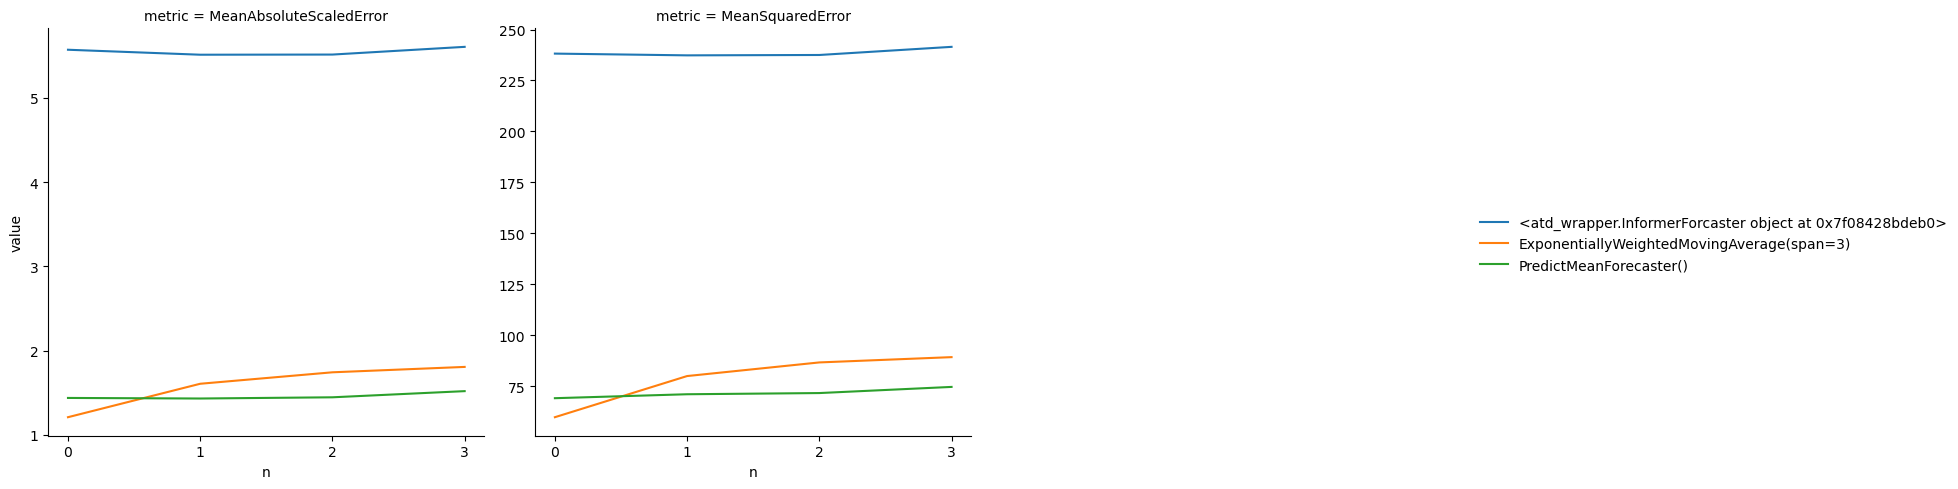

In [24]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

In [ ]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 1024 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=48
args.label_len=24
args.pred_len=1


args.batch_size = 50
args.learning_rate = 0.00001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=13
args.patience=5

In [ ]:
lispDL1 = InformerForcaster(args)

In [ ]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [ ]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]